<a href="https://colab.research.google.com/github/Venu-GR/INFO-5731_Venu-GR/blob/main/Vennapusa_Venu%20Gopal_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
# Required Libraries
!pip install bertopic
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from bertopic import BERTopic

# Load Dataset
data = pd.read_csv('imdb_annotated_reviews.csv')

# Text Representation
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['cleaned_review'])

# LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)
lda_topics = lda.components_

# Display Top Words per Topic (LDA)
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_topics):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[-10:]]))
    print("\n")

# LSA
lsa = TruncatedSVD(n_components=10, random_state=42)
lsa.fit(X)

# Display Top Words per Topic (LSA)
for topic_idx, topic in enumerate(lsa.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[-10:]]))
    print("\n")

# BERTopic
bertopic_model = BERTopic()
topics, _ = bertopic_model.fit_transform(data['cleaned_review'])
print(bertopic_model.get_topic_info())



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00
Topic 1:
favorit feel film love time batman best like watch movi


Topic 2:
good dark realli great scene like charact movi film batman


Topic 3:
stori time act best great like realli watch good movi


Topic 4:
cross given histor care incred memori screen film blockbust tragedi


Topic 5:
robert film bruce good riddler pattinson dark like movi batman


Topic 6:
time like charact pattinson look stori gotham film movi batman


Topic 7:
time cameron jack stori love ship rose film movi titan


Topic 8:
stori cameron everi jame titan time watch movi love film


Topic 9:
best like charact movi stori time cameron ship titan film


Topic 10:
like minut riddler nice action good scene bat

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   Topic  Count                     Name  \
0      0    531   0_movi_film_titan_love   
1      1    469  1_batman_movi_film_like   

                                      Representation  \
0  [movi, film, titan, love, ship, stori, time, r...   
1  [batman, movi, film, like, dark, charact, good...   

                                 Representative_Docs  
0  [movi open research tri find diamond insid wre...  
1  [likesth act strong open much film batman cast...  


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Text Representation (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['cleaned_review'])
y = data['sentiment']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluation Function
def evaluate_model(y_test, y_pred):
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

print("Logistic Regression Metrics:", evaluate_model(y_test, y_pred_lr))
print("SVM Metrics:", evaluate_model(y_test, y_pred_svm))


Logistic Regression Metrics: {'Accuracy': 0.795, 'Precision': 0.764025641025641, 'Recall': 0.795, 'F1 Score': 0.7216666666666666}
SVM Metrics: {'Accuracy': 0.78, 'Precision': 0.7023783783783785, 'Recall': 0.78, 'F1 Score': 0.7265158371040724}


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  

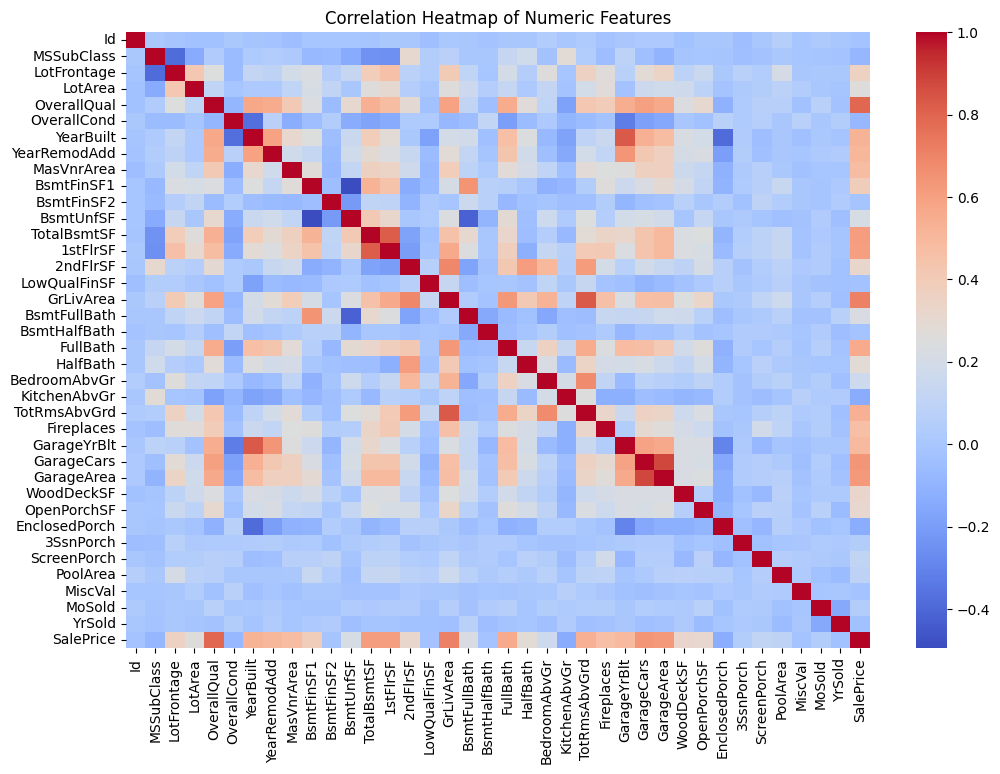

Top Features:
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')
MSE: 1565677639.1441379
MAE: 24935.83323394041
R2 Score: 0.7958786110456304


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

# Load Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Exploratory Data Analysis (EDA)
print("Dataset Info:")
print(train.info())

# Filter numeric columns for correlation
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
numeric_data = train[numeric_cols]

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
# Handle Missing Values
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Impute numeric and categorical columns
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

train_numeric = pd.DataFrame(numeric_imputer.fit_transform(train[numeric_cols]), columns=numeric_cols)
train_categorical = pd.DataFrame(categorical_imputer.fit_transform(train[categorical_cols]), columns=categorical_cols)

# One-hot encoding for categorical variables
train_categorical = pd.get_dummies(train_categorical, drop_first=True)

# Combine processed data
train_processed = pd.concat([train_numeric, train_categorical], axis=1)

# Feature Selection (Example: Top 10 correlated with SalePrice)
correlation = train_processed.corr()
top_features = correlation['SalePrice'].sort_values(ascending=False).head(10).index
print("Top Features:\n", top_features)


X = train_processed[top_features.drop('SalePrice')]
y = train_processed['SalePrice']

# Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_val)
print("MSE:", mean_squared_error(y_val, y_pred))
print("MAE:", mean_absolute_error(y_val, y_pred))
print("R2 Score:", r2_score(y_val, y_pred))


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


### Step 1: Description of the Selected PLM
- **Model Name**: distilbert-base-uncased-finetuned-sst-2-english
- **Pretraining Data**: Pre-trained on English Wikipedia and BookCorpus datasets.
- **Number of Parameters**: Approximately 66 million.
- **Fine-tuning**: Trained on the Stanford Sentiment Treebank (SST-2) dataset for binary sentiment classification.
- **Advantages**: Lightweight, efficient, and performs well in sentiment analysis tasks.


In [27]:
from transformers import pipeline
from sklearn.metrics import classification_report
import pandas as pd

# Step 1: Load and Clean Data
# Ensure the data file is in the same directory or provide the correct file path
data = pd.read_csv('imdb_annotated_reviews.csv')

# Remove rows with NaN values in 'sentiment' or 'cleaned_review'
data = data.dropna(subset=['sentiment', 'cleaned_review'])

# Map 'positive' and 'negative' to binary sentiment labels
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Drop any remaining NaN values after mapping
data = data.dropna(subset=['sentiment'])

# Step 2: Load Pre-trained Sentiment Analysis Model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name, truncation=True, max_length=256)

# Step 3: Predict Sentiments (Batch Processing)
def batch_predict(reviews, batch_size=32):
    """Batch prediction for improved performance."""
    predictions = []
    for i in range(0, len(reviews), batch_size):
        batch = reviews[i:i + batch_size]
        preds = sentiment_pipeline(batch)
        predictions.extend([1 if pred['label'] == 'POSITIVE' else 0 for pred in preds])
    return predictions

# Predict sentiments for the entire dataset
predicted_labels = batch_predict(data['cleaned_review'].tolist())

# Step 4: Evaluate Model Performance
print("Model Evaluation Metrics:")
print(classification_report(data['sentiment'].astype(int), predicted_labels))

# Optional: Output a sample of predictions for verification
print("\nSample Predictions:")
sample_results = pd.DataFrame({
    'Review': data['cleaned_review'].head(5),
    'True Sentiment': data['sentiment'].head(5),
    'Predicted Sentiment': predicted_labels[:5]
})
print(sample_results)


Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.09      0.88      0.16        48
           1       0.98      0.41      0.57       733

    accuracy                           0.43       781
   macro avg       0.53      0.64      0.37       781
weighted avg       0.93      0.43      0.55       781


Sample Predictions:
                                              Review  True Sentiment  \
0  your millenni like probabl experienc phenomeno...             1.0   
1  ive never watch titan caught interest heard st...             1.0   
2  avoid watch film longest time long even releas...             1.0   
3  watch movi watch watch movi get everi time tit...             1.0   
4  watch titan mani time dont know everytim watch...             1.0   

   Predicted Sentiment  
0                    1  
1                    1  
2                    0  
3                    1  
4                    1  
